In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, GRU, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TSLA.csv', index_col='Date', parse_dates=['Date'])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-09,439.500000,452.500000,421.000000,421.260010,421.260010,34833000
2020-11-10,420.089996,420.089996,396.029999,410.359985,410.359985,30284200
2020-11-11,416.450012,418.700012,410.579987,417.130005,417.130005,17357700
2020-11-12,415.049988,423.000000,409.519989,411.760010,411.760010,19855100
2020-11-13,410.850006,412.529999,401.660004,408.500000,408.500000,19771100


In [ ]:
df.shape

(252, 6)

In [ ]:
df.duplicated().value_counts()

False    252
dtype: int64

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,709.057779,723.652499,694.735358,710.600554,710.600554,3.091313e+07
std,129.580523,133.415348,129.455605,132.404715,132.404715,1.875027e+07
min,408.929993,412.450012,396.029999,408.089996,408.089996,9.800600e+06
25%,629.542511,649.610001,618.875000,640.212524,640.212524,1.979450e+07
50%,688.975006,704.264984,673.029999,688.854981,688.854981,2.694085e+07
75%,761.845016,774.199997,749.324982,760.197494,760.197494,3.638218e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,2.221262e+08


Text(0, 0.5, 'Price')

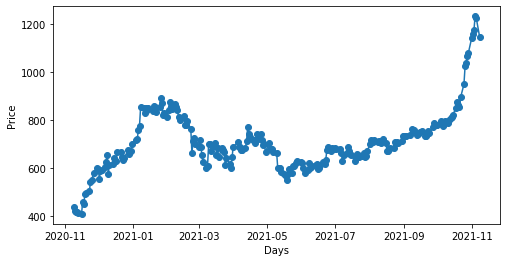

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['Open'], marker='o')
plt.xlabel('Days')
plt.ylabel('Price')

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-09,439.500000,452.500000,421.000000,421.260010,421.260010,34833000
2020-11-10,420.089996,420.089996,396.029999,410.359985,410.359985,30284200
2020-11-11,416.450012,418.700012,410.579987,417.130005,417.130005,17357700
2020-11-12,415.049988,423.000000,409.519989,411.760010,411.760010,19855100
2020-11-13,410.850006,412.529999,401.660004,408.500000,408.500000,19771100


In [ ]:
df['Moving Avg'] = df['Open'].rolling(2).mean()

In [ ]:
df[['Moving Avg', 'Open']].head()

,Moving Avg,Open
Date,,
2020-11-09,NaN,439.500000
2020-11-10,429.794998,420.089996
2020-11-11,418.270004,416.450012
2020-11-12,415.750000,415.049988
2020-11-13,412.949997,410.850006


Text(0, 0.5, 'Price')

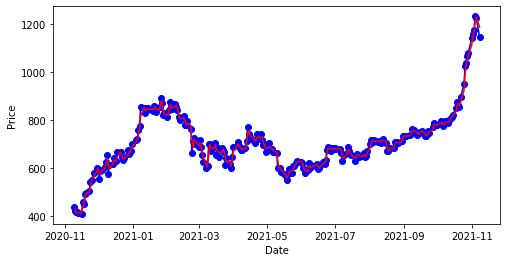

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['Open'], marker='o', color='blue')
plt.plot(df.index, df['Moving Avg'], color='red')
plt.xlabel('Date')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

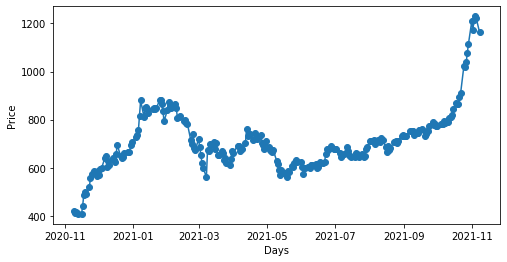

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['Close'], marker='o')
plt.xlabel('Days')
plt.ylabel('Price')

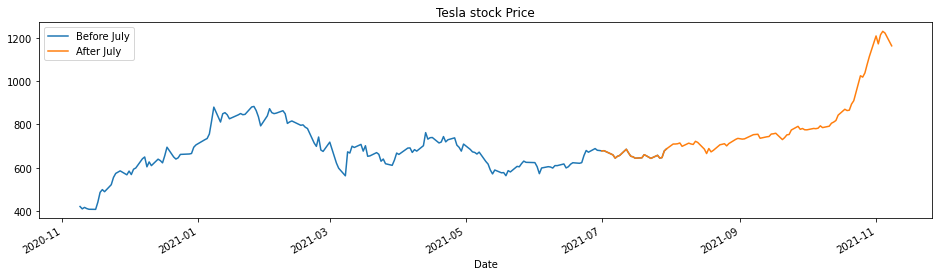

In [ ]:
df['Close'][:'2021-07'].plot(figsize=(16,4), legend=True)
df['Close']['2021-07':].plot(figsize=(16,4), legend=True)
plt.legend(['Before July', 'After July'])
plt.title('Tesla stock Price')
plt.show()

In [ ]:
training_set = df[:'2021-07']['Close'].values
test_set = df['2021-07':]['Close'].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
SC = MinMaxScaler(feature_range=(0,1))
training_Set_Scaled = SC.fit_transform(np.array(training_set).reshape(-1,1))
test_set_Scaled  = SC.fit_transform(np.array(test_set).reshape(-1, 1))

In [ ]:
training_Set_Scaled[0:5]

array([[0.02772634],
       [0.00477892],
       [0.0190316 ],
       [0.00772634],
       [0.00086317]])

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i : (i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step=1
X_train, Y_train = create_dataset(training_Set_Scaled, time_step)
X_test, Y_test = create_dataset(test_set_Scaled, time_step)

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(180, 1) (89, 1) (180,) (89,)


In [ ]:
X_train

array([[2.77263435e-02],
       [4.77892390e-03],
       [1.90315967e-02],
       [7.72634476e-03],
       [8.63166259e-04],
       [0.00000000e+00],
       [7.05683933e-02],
       [1.65368450e-01],
       [1.91957867e-01],
       [1.71621018e-01],
       [2.39494679e-01],
       [3.10084209e-01],
       [3.49284196e-01],
       [3.74042110e-01],
       [3.35810462e-01],
       [3.71936847e-01],
       [3.38378948e-01],
       [3.90084204e-01],
       [4.01999936e-01],
       [4.91936839e-01],
       [5.09031565e-01],
       [4.13452571e-01],
       [4.61010519e-01],
       [4.25052591e-01],
       [4.87873697e-01],
       [4.74021030e-01],
       [4.51957916e-01],
       [5.21705288e-01],
       [6.04021022e-01],
       [5.08989417e-01],
       [4.88947402e-01],
       [5.00820986e-01],
       [5.34063174e-01],
       [5.38105241e-01],
       [5.42947320e-01],
       [6.03557925e-01],
       [6.26484142e-01],
       [6.77221059e-01],
       [6.88463090e-01],
       [7.32399919e-01],


In [ ]:
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(180,1)))
model.add(Dropout(0.2))
model.add(GRU(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 180, 50)           7950      
                                                                 
 dropout (Dropout)           (None, 180, 50)           0         
                                                                 
 gru_1 (GRU)                 (None, 180, 50)           15300     
                                                                 
 dropout_1 (Dropout)         (None, 180, 50)           0         
                                                                 
 gru_2 (GRU)                 (None, 50)                15300     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 38,601
Trainable params: 38,601
Non-traina

In [ ]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=64, verbose=2)

Epoch 1/100
3/3 - 6s - loss: 0.3104 - accuracy: 0.0056 - val_loss: 0.0838 - val_accuracy: 0.0112 - 6s/epoch - 2s/step
Epoch 2/100
3/3 - 0s - loss: 0.2563 - accuracy: 0.0056 - val_loss: 0.0659 - val_accuracy: 0.0112 - 35ms/epoch - 12ms/step
Epoch 3/100
3/3 - 0s - loss: 0.2007 - accuracy: 0.0056 - val_loss: 0.0505 - val_accuracy: 0.0112 - 33ms/epoch - 11ms/step
Epoch 4/100
3/3 - 0s - loss: 0.1419 - accuracy: 0.0056 - val_loss: 0.0398 - val_accuracy: 0.0112 - 33ms/epoch - 11ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0896 - accuracy: 0.0056 - val_loss: 0.0375 - val_accuracy: 0.0112 - 35ms/epoch - 12ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0477 - accuracy: 0.0056 - val_loss: 0.0482 - val_accuracy: 0.0225 - 32ms/epoch - 11ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0188 - accuracy: 0.0111 - val_loss: 0.0735 - val_accuracy: 0.0225 - 33ms/epoch - 11ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0234 - accuracy: 0.0111 - val_loss: 0.1020 - val_accuracy: 0.0225 - 35ms/epoch - 12ms/step
Epoch 9/100
3/3 - 0s - loss:

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [ ]:
train_predict = SC.inverse_transform(train_predict)
test_predict = SC.inverse_transform(test_predict)

In [ ]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(Y_train, train_predict)))
print(np.sqrt(mean_squared_error(Y_test, test_predict)))

974.5197633671072
798.4515791007755


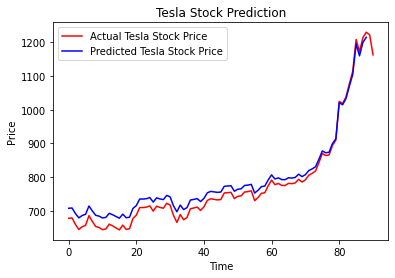

In [ ]:
def plot_predictions(test, predicted):
    plt.plot(test, color='red', label="Actual Tesla Stock Price")
    plt.plot(predicted, color='blue', label="Predicted Tesla Stock Price")
    plt.title("Tesla Stock Prediction")
    plt.xlabel('Time')
    plt.ylabel("Price")
    plt.legend()
    plt.show()
plot_predictions(test_set, test_predict)